# Astr 4330 Hw. # 3
## Zade Alfalah

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Part 1: Short Answer Questions
1. What are three ways that we can measure the composition of our solar system?
2. What are the three types of mass-dependent fractionation? Describe briefly how they
work.
3. What is the cause of the variations in oxygen isotope composition within our solar
system? Make sure to explain both the slope 1 and ½ lines in the following diagram
(Figure A). Why is the sun not at the center of this diagram?

1. Observational measures of sun, two types of sample measures of sun.  Samples w/ similar compositions to our sun.  Lecture plot has measure of sun vs measure of a certain type of sample earlier in the semester.  

    a) Collection of solar winds
    
    b) Study of solar spectra

    c) Study of carbonaceous chondrites' composition
    
2.

    a) Equilibrium Fractionation
    
    This is where the heavier isotope equilibrates into the compound/phase in which it is most stably bound

    b) Kinetic Fractionation
    
    This is simply a result of the fact that heavier isotopes move more slowly, and therefore react more slowly.  An example of this is diffusion.

    c) Rayleigh Fractionation
    
    This type of fractionation describes the evolution of a system where one phase is continuously removed.  Eg: Isotopic enrichment
    
3.
    The slope 1/2 line is from mass dependant fractionation, whereas the slope 1 line is from mass independant fractionation.  "Isotopic compositions result from mixing different proportions of distinct components produced in different locations... " - Mcsween, pg. 223.  The slope of 1 means that if two samples on the line differ by 2 per mille in O-18 / O-16 they will differ in O-17 / O-16 by the same ammount.  The samples on the slope 1/2 line instead differ in O-17 / O-16 by 1 per mille with the same O-18 / O-16 difference, as stated in the following link:
    http://www.psrd.hawaii.edu/Dec01/Oisotopes.html
Stars produce different isotopes of O at different abundances based off of their age.

In this section, you will investigate the condensation of the first CAIs and chondrules using the
Al-Mg isotope system. Use the Al and Mg isotopic data and corresponding uncertainties for a
CAI and a chondrule given in spreadsheet labelled “PS3_Data.xlsx” to answer the following
questions.

In [2]:
#all below for sample 1 3138 F8 CAI

In [3]:
Phase = ["Hibonite", "Melilite","Melilite","Melilite","Melilite","Melilite","Melilite","Melilite","Melilite","Melilite","Melilite", "Fassaite","Fassaite","Fassaite","Fassaite","Fassaite","Fassaite","Olivine"]
al27_24mg = [15.20,15.90,16.30,18.20,21.20,86.60,85.60,95.50,91.10,44.20,76.60,5.10,4.52,4.41,2.74,2.72,2.66,0.10]
sig2 = [1.50,0.30,0.30,0.30,0.40,1.60,1.50,1.60,1.70,0.80,1.50,0.27,0.24,0.23,0.03,0.03,0.03,0.01]
delta26mg = [6.30,7.30,6.10,8.20,8.10,30.70,32.20,33.60,36.30,15.60,28.80,2.00,1.75,1.58,0.81,1.00,0.94,0.00]
sig2percent = [1.20,1.20,1.50,1.20,1.50,2.60,2.80,2.90,3.20,2.40,3.50,0.12,0.16,0.14,0.13,0.13,0.13,0.02]

dict = {"phase": Phase, "al27_mg24": al27_24mg, '2sig': sig2, "delta26mg":delta26mg, "2sigpercent": sig2percent}
CAI = pd.DataFrame(dict)

In [4]:
#all below for sample 2 CH4 Chondrule
Phase = ["Plagioclase","Plagioclase","Plagioclase","Plagioclase","Plagioclase","Olivine"]
al27_24mg = [99, 208, 181, 139, 123, 0.1]
sig2 = [4.95, 10.40, 9.05, 6.95, 6.15, 0.01]
delta26mg = [10.37, 13.38,12.45, 7.14, 6.78, 0]
sig2percent = [7.03, 3.87, 4.09, 3.37, 3.16, 0.02]
dict = {"phase": Phase, "al27_mg24": al27_24mg, '2sig': sig2, "delta26mg":delta26mg, "2sigpercent": sig2percent}
Chondrule = pd.DataFrame(dict)

In [5]:
CAI.head()

,phase,al27_mg24,2sig,delta26mg,2sigpercent
0,Hibonite,15.2,1.5,6.3,1.2
1,Melilite,15.9,0.3,7.3,1.2
2,Melilite,16.3,0.3,6.1,1.5
3,Melilite,18.2,0.3,8.2,1.2
4,Melilite,21.2,0.4,8.1,1.5


In [6]:
Chondrule.head()

,phase,al27_mg24,2sig,delta26mg,2sigpercent
0,Plagioclase,99.0,4.95,10.37,7.03
1,Plagioclase,208.0,10.40,13.38,3.87
2,Plagioclase,181.0,9.05,12.45,4.09
3,Plagioclase,139.0,6.95,7.14,3.37
4,Plagioclase,123.0,6.15,6.78,3.16


1. What is the radioactive decay system that is basis of Al-Mg chronology? What is the
half-life of this system? Would the parent isotope be considered a short-lived or longlived radionuclide?

Al 26 decays to Mg 26 with a half life of 720,000 years, we use and the deviation from the natural abundance of Mg 26 and compare it to the ratio of the stable isotopes Al 27 / Mg 24.
It is a short-lived radionuclide.

2. Calculate the 26Mg/24Mg ratio and corresponding uncertainties for each CAI and the
chondrule. Plot the 26Mg/24Mg ratio vs. 26Al/27Al ratio for the CAIs and the chondrule
(plot as two different datasets on the same figure – it will make the following questions
easier). Add the uncertainties as error bars for each data point. Include this figure as
part of your response.

In [7]:
# Since delta=(sample-std)/std*1000, we can rewrite so sample=(delta*std/1000)+std


std = 0.139384732 #standard 26Mg/24Mg  
bucket = [] # for mg26/mg24
bucket2 = [] # for 2sigma of mg26/mg24
for index, row in CAI.iterrows():
    #print((row['delta26mg']*std/1000) + std)
    bucket.append((row['delta26mg']*std/1000) + std)
    bucket2.append((row['2sig']*abs(std/1000)))
CAI['mg26_mg24'] = bucket
CAI["mg_mg_2sig"] = bucket2

bucket = []
bucket2 = []
for index, row in Chondrule.iterrows():
    #print((row['delta26mg']*std/1000) + std)
    bucket.append((row['delta26mg']*std/1000) + std)
    bucket2.append((row['2sig']*abs(std/1000)))
Chondrule['mg26_mg24'] = bucket
Chondrule["mg_mg_2sig"] = bucket2

In [22]:
CAI

,phase,al27_mg24,2sig,delta26mg,2sigpercent,mg26_mg24,mg_mg_2sig
0,Hibonite,15.20,1.50,6.30,1.20,0.140263,0.000209
1,Melilite,15.90,0.30,7.30,1.20,0.140402,0.000042
2,Melilite,16.30,0.30,6.10,1.50,0.140235,0.000042
3,Melilite,18.20,0.30,8.20,1.20,0.140528,0.000042
4,Melilite,21.20,0.40,8.10,1.50,0.140514,0.000056
5,Melilite,86.60,1.60,30.70,2.60,0.143664,0.000223
6,Melilite,85.60,1.50,32.20,2.80,0.143873,0.000209
7,Melilite,95.50,1.60,33.60,2.90,0.144068,0.000223
8,Melilite,91.10,1.70,36.30,3.20,0.144444,0.000237
9,Melilite,44.20,0.80,15.60,2.40,0.141559,0.000112


In [23]:
Chondrule

,phase,al27_mg24,2sig,delta26mg,2sigpercent,mg26_mg24,mg_mg_2sig
0,Plagioclase,99.0,4.95,10.37,7.03,0.140830,0.000690
1,Plagioclase,208.0,10.40,13.38,3.87,0.141250,0.001450
2,Plagioclase,181.0,9.05,12.45,4.09,0.141120,0.001261
3,Plagioclase,139.0,6.95,7.14,3.37,0.140380,0.000969
4,Plagioclase,123.0,6.15,6.78,3.16,0.140330,0.000857
5,Olivine,0.1,0.01,0.00,0.02,0.139385,0.000001


In [10]:
from numpy import arange,array,ones
from scipy import stats

The origianl ratio in the CAI was 5.13e-05
The original ratio in the Chondrule was 8.54e-06


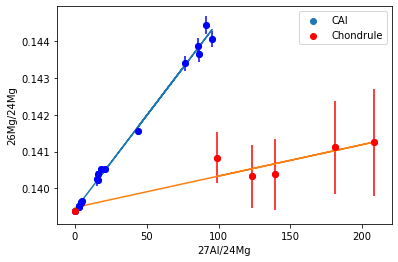

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

slope, intercept, r_value, p_value, std_err = stats.linregress(CAI.al27_mg24,CAI.mg26_mg24)
line = slope*CAI.al27_mg24+intercept
ax1.plot(CAI.al27_mg24, line)
print(f"The origianl ratio in the CAI was {slope:.3}")

slope, intercept, r_value, p_value, std_err = stats.linregress(Chondrule.al27_mg24,Chondrule.mg26_mg24)
line = slope*Chondrule.al27_mg24+intercept
ax1.plot(Chondrule.al27_mg24, line)
print(f"The original ratio in the Chondrule was {slope:.3}")



ax1.scatter(y=CAI.mg26_mg24, x= CAI.al27_mg24, label = "CAI") #check email she sent. 
ax1.scatter(y=Chondrule.mg26_mg24, x= Chondrule.al27_mg24, color = 'r', label = "Chondrule")
ax1.errorbar(CAI.al27_mg24, CAI.mg26_mg24, yerr = CAI.mg_mg_2sig, fmt  = 'o', c = 'b')
ax1.errorbar(Chondrule.al27_mg24, Chondrule.mg26_mg24, yerr = Chondrule.mg_mg_2sig, fmt = 'o', c = 'r')

plt.xlabel("27Al/24Mg")
plt.ylabel("26Mg/24Mg")
plt.legend()

In [12]:
# lecture 8 gives example of short lived chronology

3. Determine the initial 26Al/27Al ratio of the CAI and the chondrule. (Hint: Look back on
your class notes for how to use your plotted data to find this value.)

The slope of the isochrons give our initial ratios, and are printed above the graph.

4. Which formed first, the CAI or the chondrule? What event are we dating?

The original ratio in the chondrule was lower than the original ratio in the CAI, which indicates that the CAI formed first when the al26/27 ratio was higher, and the chondrule later when it was lower as the ratio decreases over time as the al26 decays.  This allows us to put a number to a difference in formation dates which -should we be given either one of the ages - allows us to find the age of both as it appears we will in the following questions.

5. What is the difference between the initial 26Al/27Al ratio of the CAI and chondrule?

Ratio Chondrule - Ratio CAI = 

8.54e-6 - 5.13e-5 = -4.276e-5



6. Using this same age equation, calculate the uncertainty that Al isotopic composition
contributes to the CAI age if the uncertainty on the initial 26Al/27Al ratio was 0.4E-6.
With this uncertainty, can we resolve the age of CAIs that formed 1,000 years apart?

#The question is asking if the minimum difference between R1 and R2 we can measure is 0.4E-6, 
#what change in age does this correspond to. (i.e. if R2 = R1 – 0.4E-6)

halflife = 720000 #years

lmbda = np.log(2) / halflife

R1 = 5.13e-5

R2 = R1 - 0.4e-6

R2 = R1 e^(-lmbda*t)

We solve for t to find t ~= 8131 years

At 8131 years we would not be able to resolve the age of CAIs that formed 1000 years apart.

7. The 207Pb206Pb age of the CAI indicates that it formed 4567 Ma. What is the absolute
age of the chondrule?

In [21]:
halflife = 720000 #years
lmbda = np.log(2) / halflife
#print(lmbda)
#first slope for CAI
slope, intercept, r_value, p_value, std_err = stats.linregress(CAI.al27_mg24,CAI.mg26_mg24)
R1 = slope

#then slope for chondrules
slope, intercept, r_value, p_value, std_err = stats.linregress(Chondrule.al27_mg24,Chondrule.mg26_mg24)
R2 = slope

d_time = (1/lmbda)*np.log(R1/R2)
print(f"Calculate that these chondrules form ~ {d_time:.3} years after the CAI's")
print(f"Since the CAI formed 4567 Ma, this means that the absolute age of the chondrule is {4567*10**6 - d_time:.5} years old as opposed to the CAI's age of {4567*10**6.:.5} years old." )


Calculate that these chondrules form ~ 1.86e+06 years after the CAI's
Since the CAI formed 4567 Ma, this means that the absolute age of the chondrule is 4.5651e+09 years old as opposed to the CAI's age of 4.567e+09 years old.


8. The initial ratios for both the CAI and the chondrule are forced through the terrestrial
composition using olivine data. What happens to the inferred initial 26Al/27Al ratio of the
chondrule if we do not do this? How does this change the age difference between the CAI
and the chondrule? (Note: you will have to change your figure from Part 2 to answer this
question. However, you do not need to hand in a new plot for this question

In [15]:
CAI_removed = CAI.drop(CAI.index[-1])
Chondrule_removed =Chondrule.drop(Chondrule.index[-1])

In [16]:
std = 0.139384732 #standard 26Mg/24Mg  
bucket = [] # for mg26/mg24
bucket2 = [] # for 2sigma of mg26/mg24
for index, row in CAI_removed.iterrows():
    #print((row['delta26mg']*std/1000) + std)
    bucket.append((row['delta26mg']*std/1000) + std)
    bucket2.append((row['2sig']*abs(std/1000)))
CAI_removed['mg26_mg24'] = bucket
CAI_removed["mg_mg_2sig"] = bucket2

bucket = []
bucket2 = []
for index, row in Chondrule_removed.iterrows():
    #print((row['delta26mg']*std/1000) + std)
    bucket.append((row['delta26mg']*std/1000) + std)
    bucket2.append((row['2sig']*abs(std/1000)))
Chondrule_removed['mg26_mg24'] = bucket
Chondrule_removed["mg_mg_2sig"] = bucket2

In [17]:
slope, intercept, r_value, p_value, std_err = stats.linregress(CAI_removed.al27_mg24,CAI_removed.mg26_mg24)
line = slope*CAI_removed.al27_mg24+intercept
ax1.plot(CAI_removed.al27_mg24, line)
print(f"The origianl ratio in the CAI was {slope:.3} without olivine")
R1 = slope

slope, intercept, r_value, p_value, std_err = stats.linregress(Chondrule_removed.al27_mg24,Chondrule_removed.mg26_mg24)
line = slope*Chondrule_removed.al27_mg24+intercept
ax1.plot(Chondrule_removed.al27_mg24, line)
R2 = slope
print(f"The original ratio in the Chondrule was {slope:.3} without olivine")

The origianl ratio in the CAI was 5.12e-05 without olivine
The original ratio in the Chondrule was 6.66e-06 without olivine


In [24]:
d_time2= (1/lmbda)*np.log(R1/R2)
print(f"{d_time2:.5} years is the new age difference between the CAI and Chondrule.  The old age difference was {d_time:.5} years")

1.8621e+06 years is the new age difference between the CAI and Chondrule.  The old age difference was 1.8621e+06 years


When we remove the olivine data from both datasets we find that the initial ratio of our chondrule goes from 8.54e-6 to 6.66e-6 and that the age difference changes as mentioned immediately above.

9. From this dataset, you conclude that chondrules formed after CAIs. What are the two
major assumptions that go into this conclusion?

Two big assumptions that we make are 

    a) These samples are representative of the bulk composition of all chondrules and CAIs 
    
    b) Nothing else influenced the relative ratios that we used to come to any of our results or our general conclusion.  We have a perfectly isolated system